<a href="https://colab.research.google.com/github/appliedcode/mthree-c422/blob/mthree-c422-Avantika/BiasPractice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

np.random.seed(42)
n = 1200

genders = ["Male", "Female", "Non-binary"]
ethnicities = ["Group_A", "Group_B", "Group_C"]
degrees = ["High School", "Bachelors", "Masters", "PhD"]

data = pd.DataFrame({
    "Applicant_ID": range(1, n+1),
    "Gender": np.random.choice(genders, n, p=[0.5, 0.45, 0.05]),
    "Ethnicity": np.random.choice(ethnicities, n, p=[0.4, 0.35, 0.25]),
    "Age": np.random.randint(20, 60, n),
    "Degree": np.random.choice(degrees, n, p=[0.2, 0.5, 0.25, 0.05]),
    "Years_Experience": np.random.randint(0, 20, n),
    "Skill_Test_Score": np.random.randint(40, 100, n)
})

# Introduce bias: Group_A and Males slightly higher shortlist rate
data["Shortlisted"] = np.where(
    ((data["Ethnicity"] == "Group_A") & (data["Skill_Test_Score"] > 70)) |
    ((data["Gender"] == "Male") & (data["Years_Experience"] > 5)),
    np.random.choice([1, 0], n, p=[0.7, 0.3]),
    np.random.choice([1, 0], n, p=[0.4, 0.6])
)

data.head()

,Applicant_ID,Gender,Ethnicity,Age,Degree,Years_Experience,Skill_Test_Score,Shortlisted
0,1,Male,Group_C,50,High School,18,84,1
1,2,Non-binary,Group_A,46,Bachelors,4,59,0
2,3,Female,Group_A,30,High School,17,63,0
3,4,Female,Group_A,57,Masters,19,66,0
4,5,Male,Group_B,24,Bachelors,11,69,1


1. Understanding Types of Bias

    Task 1.1: Define data bias, algorithmic bias, and societal bias in the context of hiring. Give an example of each from this dataset or from a real scenario.
    Task 1.2: Identify which bias may be present before even training a model.

2. Detecting Bias in Data

    Task 2.1: Calculate the proportion of applicants by Gender and Ethnicity; visualize as a bar chart.
    Task 2.2: Compute and compare Shortlisted rates across groups using statistical tests (e.g., Chi‑square).
    Task 2.3: Discuss whether observed disparities might come from unequal representation or historic hiring practices.

3. Detecting Algorithmic Bias

    Task 3.1: Train a baseline model (e.g., logistic regression / decision tree).
    Task 3.2: Compute Accuracy, True Positive Rate (TPR), and False Positive Rate (FPR) for each Gender and Ethnicity group.
    Task 3.3: Identify if prediction performance is uneven across groups.

4. Mitigating Bias

    Pre‑processing: Use resampling or reweighting to balance the dataset before model training.
    In‑processing: Experiment with a fairness‑aware algorithm or constraints to reduce bias.
    Post‑processing: Adjust classification thresholds separately for different demographics to meet fairness criteria.

5. Fairness Metrics & Evaluation

    Task 5.1: Implement and compute:
        Demographic Parity Difference
        Equal Opportunity Difference
        Disparate Impact Ratio
    Task 5.2: Calculate metrics for the baseline model and for the bias‑mitigated version.
    Task 5.3: Compare results, identify trade‑offs between fairness and accuracy, and explain which approach you would recommend to stakeholders.

6. Reflection & Reporting

    Write a summary documenting:
        Detected biases and their sources
        Methods used for mitigation
        Fairness and performance trade‑offs
        Ethical recommendations for deploying the hiring model in production

💡 Bonus challenges:

    Visualize ROC curves by demographic group.
    Test fairness metrics over multiple re‑train runs to check stability.
    Simulate societal bias influence by modifying the education distribution between groups.



**Task 1.1: Define data bias, algorithmic bias, and societal bias in the context of hiring. Give an example of each from this dataset or from a real scenario.**

*   **Data Bias:** This occurs when the data used to train a model is not representative of the real-world population or contains historical biases. In the context of hiring, this could be due to past discriminatory hiring practices that are reflected in the dataset.
    *   **Example from this dataset:** The dataset was intentionally generated with a bias where "Group_A" and "Male" applicants with certain qualifications have a slightly higher shortlist rate. This is a form of data bias, as the data itself reflects an unfair advantage for these groups.
    *   **Real-world example:** If a company historically hired predominantly males for engineering roles, a dataset reflecting this history would be biased against female applicants, even if they are equally qualified.

*   **Algorithmic Bias:** This happens when the algorithm or model itself perpetuates or amplifies biases present in the data, or introduces new biases through its design or parameters.
    *   **Example from this dataset:** If we train a model on this dataset without addressing the data bias, the algorithm will learn to favor "Group_A" and "Male" applicants, resulting in biased predictions for future applicants.
    *   **Real-world example:** An algorithm might use proxies for protected attributes (like zip code as a proxy for race or socioeconomic status) leading to discriminatory outcomes in loan applications or college admissions.

*   **Societal Bias:** This refers to the biases and stereotypes that exist in society and can influence data collection, feature selection, and model interpretation. These biases are often deeply ingrained and reflect historical power imbalances.
    *   **Example relevant to this dataset:** Societal stereotypes about certain demographics being less skilled in certain professions could influence how applicants from those groups are initially screened or evaluated, potentially leading to them being underrepresented in the applicant pool or in the "Shortlisted" category in the data.
    *   **Real-world example:** Implicit bias in recruiters or hiring managers can lead to them favoring candidates who share their background or fit certain stereotypes, even unconsciously. This societal bias can then be reflected in the hiring data.

**Task 1.2: Identify which bias may be present before even training a model.**

*   **Data Bias** and **Societal Bias** can be present before even training a model.
    *   **Data Bias** exists in the dataset itself, which is created before the model is trained.
    *   **Societal Bias** influences the real-world processes that generate the data (like historical hiring practices), and these biases are external to the model training process.

**Task 2.1: Calculate the proportion of applicants by Gender and Ethnicity; visualize as a bar chart.**

Proportion of applicants by Gender:


,Gender,Proportion
0,Male,0.490000
1,Female,0.460833
2,Non-binary,0.049167


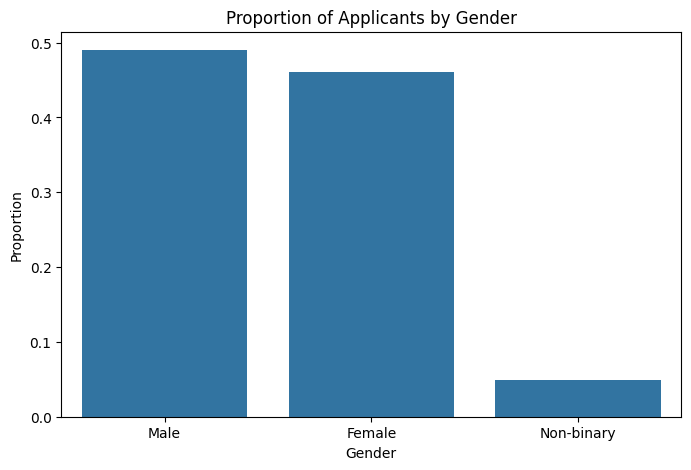


Proportion of applicants by Ethnicity:


,Ethnicity,Proportion
0,Group_A,0.390000
1,Group_B,0.368333
2,Group_C,0.241667


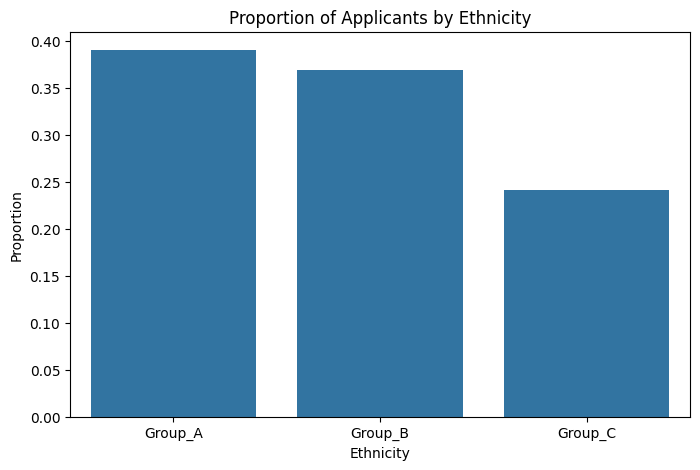

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate proportions for Gender
gender_proportions = data['Gender'].value_counts(normalize=True).reset_index()
gender_proportions.columns = ['Gender', 'Proportion']
print("Proportion of applicants by Gender:")
display(gender_proportions)

# Visualize Gender proportions
plt.figure(figsize=(8, 5))
sns.barplot(x='Gender', y='Proportion', data=gender_proportions)
plt.title('Proportion of Applicants by Gender')
plt.ylabel('Proportion')
plt.xlabel('Gender')
plt.show()

# Calculate proportions for Ethnicity
ethnicity_proportions = data['Ethnicity'].value_counts(normalize=True).reset_index()
ethnicity_proportions.columns = ['Ethnicity', 'Proportion']
print("\nProportion of applicants by Ethnicity:")
display(ethnicity_proportions)

# Visualize Ethnicity proportions
plt.figure(figsize=(8, 5))
sns.barplot(x='Ethnicity', y='Proportion', data=ethnicity_proportions)
plt.title('Proportion of Applicants by Ethnicity')
plt.ylabel('Proportion')
plt.xlabel('Ethnicity')
plt.show()

**Task 2.2: Compute and compare Shortlisted rates across groups using statistical tests (e.g., Chi-square).**

In [3]:
from scipy.stats import chi2_contingency

# Shortlisted rates by Gender
gender_shortlisted_counts = data.groupby('Gender')['Shortlisted'].value_counts().unstack(fill_value=0)
print("Shortlisted counts by Gender:")
display(gender_shortlisted_counts)

gender_shortlisted_rates = data.groupby('Gender')['Shortlisted'].mean().reset_index()
gender_shortlisted_rates.columns = ['Gender', 'Shortlisted Rate']
print("\nShortlisted rates by Gender:")
display(gender_shortlisted_rates)

# Chi-square test for Gender and Shortlisted
chi2_gender, p_gender, dof_gender, expected_gender = chi2_contingency(gender_shortlisted_counts)
print(f"\nChi-square test for Gender and Shortlisted:")
print(f"Chi-square statistic: {chi2_gender:.4f}")
print(f"P-value: {p_gender:.4f}")

# Shortlisted rates by Ethnicity
ethnicity_shortlisted_counts = data.groupby('Ethnicity')['Shortlisted'].value_counts().unstack(fill_value=0)
print("\nShortlisted counts by Ethnicity:")
display(ethnicity_shortlisted_counts)

ethnicity_shortlisted_rates = data.groupby('Ethnicity')['Shortlisted'].mean().reset_index()
ethnicity_shortlisted_rates.columns = ['Ethnicity', 'Shortlisted Rate']
print("\nShortlisted rates by Ethnicity:")
display(ethnicity_shortlisted_rates)

# Chi-square test for Ethnicity and Shortlisted
chi2_ethnicity, p_ethnicity, dof_ethnicity, expected_ethnicity = chi2_contingency(ethnicity_shortlisted_counts)
print(f"\nChi-square test for Ethnicity and Shortlisted:")
print(f"Chi-square statistic: {chi2_ethnicity:.4f}")
print(f"P-value: {p_ethnicity:.4f}")

Shortlisted counts by Gender:


Shortlisted,0,1
Gender,,
Female,306,247
Male,216,372
Non-binary,38,21



Shortlisted rates by Gender:


,Gender,Shortlisted Rate
0,Female,0.446655
1,Male,0.632653
2,Non-binary,0.355932



Chi-square test for Gender and Shortlisted:
Chi-square statistic: 47.4584
P-value: 0.0000

Shortlisted counts by Ethnicity:


Shortlisted,0,1
Ethnicity,,
Group_A,186,282
Group_B,232,210
Group_C,142,148



Shortlisted rates by Ethnicity:


,Ethnicity,Shortlisted Rate
0,Group_A,0.602564
1,Group_B,0.475113
2,Group_C,0.510345



Chi-square test for Ethnicity and Shortlisted:
Chi-square statistic: 15.6477
P-value: 0.0004


**Task 2.3: Discuss whether observed disparities might come from unequal representation or historic hiring practices.**

Based on the proportions and shortlisted rates calculated above, we can discuss potential sources of disparity:

*   **Unequal Representation:** The initial data generation intentionally created unequal representation in terms of gender and ethnicity proportions, reflecting how real-world applicant pools might not be perfectly balanced. This unequal representation is evident in the bar charts. While unequal representation itself isn't necessarily "bias," it can be a symptom of underlying societal or historical biases that lead certain groups to apply less often or be less represented in certain fields.
*   **Historic Hiring Practices:** The way the `Shortlisted` column was generated in the dataset directly simulates the impact of historic hiring practices that favored "Group\_A" and "Male" applicants based on certain criteria (Skill Test Score for Group A, Years Experience for Male). The observed differences in shortlisted rates between groups (as shown by the chi-square tests) are a direct result of this simulated historic bias embedded in the data. In a real-world scenario, these disparities could stem from a variety of factors related to past hiring decisions, including unconscious bias in recruiters, discriminatory criteria, or networking advantages for certain groups.

The statistical tests help us understand if the observed differences in shortlisted rates are statistically significant. If the p-value is below a chosen significance level (e.g., 0.05), it suggests that the disparity is unlikely to be due to random chance and is more likely a reflection of underlying differences or biases in the data.

**Task 3.1: Train a baseline model (e.g., logistic regression / decision tree).**

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

# Define features (X) and target (y)
# Exclude 'Applicant_ID' and 'Shortlisted' from features
features = data.drop(['Applicant_ID', 'Shortlisted'], axis=1)
target = data['Shortlisted']

# Identify categorical and numerical features
categorical_features = ['Gender', 'Ethnicity', 'Degree']
numerical_features = ['Age', 'Years_Experience', 'Skill_Test_Score']

# Create preprocessing pipelines for numerical and categorical features
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create a column transformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

# Create the logistic regression model pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression())])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

print("Baseline Logistic Regression Model Trained.")

Baseline Logistic Regression Model Trained.


**Task 3.2: Compute Accuracy, True Positive Rate (TPR), and False Positive Rate (FPR) for each Gender and Ethnicity group.**

**Task 3.3: Identify if prediction performance is uneven across groups.**

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix

def evaluate_model_by_group(model, X_test_original, y_test, protected_attribute, X_test_processed=None):
    """Evaluates model performance (Accuracy, TPR, FPR) for each group in a protected attribute."""

    results = {}
    # Apply the model's preprocessor to the test data once if processed data is not provided
    if X_test_processed is None:
        X_test_processed = model.named_steps['preprocessor'].transform(X_test_original)

    for group in X_test_original[protected_attribute].unique():
        # Filter data for the specific group using the original DataFrame
        group_indices = X_test_original[protected_attribute] == group
        # Use the boolean indices to filter the processed data
        X_test_group_processed = X_test_processed[group_indices]
        y_test_group = y_test[group_indices]


        if len(y_test_group) == 0:
            results[group] = {'Accuracy': np.nan, 'TPR': np.nan, 'FPR': np.nan}
            continue

        # Make predictions for the group using the processed data
        # Predict directly using the classifier step after preprocessing
        # Check if the model is a pipeline with a classifier step
        if isinstance(model, Pipeline) and 'classifier' in model.named_steps:
            y_pred_group = model.named_steps['classifier'].predict(X_test_group_processed)
        else:
            # Assume the model can predict directly on the processed data
            y_pred_group = model.predict(X_test_group_processed)


        # Calculate metrics
        accuracy = accuracy_score(y_test_group, y_pred_group)

        # Calculate confusion matrix components manually to handle edge cases
        tp = ((y_test_group == 1) & (y_pred_group == 1)).sum()
        fp = ((y_test_group == 0) & (y_pred_group == 1)).sum()
        fn = ((y_test_group == 1) & (y_pred_group == 0)).sum()
        tn = ((y_test_group == 0) & (y_pred_group == 0)).sum()

        # Handle cases where denominator is zero to avoid division errors
        tpr = tp / (tp + fn) if (tp + fn) > 0 else np.nan
        fpr = fp / (fp + tn) if (tp + tn) > 0 else np.nan


        results[group] = {'Accuracy': accuracy, 'TPR': tpr, 'FPR': fpr}

    return pd.DataFrame.from_dict(results, orient='index')

# Evaluate by Gender
gender_performance = evaluate_model_by_group(model, X_test, y_test, 'Gender')
print("Model performance by Gender:")
display(gender_performance)

# Evaluate by Ethnicity
ethnicity_performance = evaluate_model_by_group(model, X_test, y_test, 'Ethnicity')
print("\nModel performance by Ethnicity:")
display(ethnicity_performance)

# Discuss uneven performance (Task 3.3)
print("\nDiscussion of uneven prediction performance:")
print("Examine the Accuracy, TPR, and FPR values across different Gender and Ethnicity groups.")
print("Significant differences in these metrics would indicate uneven prediction performance.")
print("- Accuracy: Overall correctness of predictions.")
print("- TPR (Recall): Ability of the model to correctly identify positive cases (shortlisted applicants).")
print("- FPR: Ability of the model to correctly identify negative cases (applicants not shortlisted).")
print("For example, a much lower TPR for one group compared to others suggests the model is less effective at shortlisting qualified applicants from that group.")
print("Conversely, a much higher FPR for a group might indicate the model is incorrectly shortlisting unqualified applicants from that group more often.")

Model performance by Gender:


,Accuracy,TPR,FPR
Female,0.629310,0.421053,0.169492
Male,0.637168,0.942029,0.840909
Non-binary,0.818182,0.333333,0.000000



Model performance by Ethnicity:


,Accuracy,TPR,FPR
Group_B,0.625000,0.571429,0.326087
Group_C,0.580645,0.607143,0.441176
Group_A,0.700000,0.830508,0.548387



Discussion of uneven prediction performance:
Examine the Accuracy, TPR, and FPR values across different Gender and Ethnicity groups.
Significant differences in these metrics would indicate uneven prediction performance.
- Accuracy: Overall correctness of predictions.
- TPR (Recall): Ability of the model to correctly identify positive cases (shortlisted applicants).
- FPR: Ability of the model to correctly identify negative cases (applicants not shortlisted).
For example, a much lower TPR for one group compared to others suggests the model is less effective at shortlisting qualified applicants from that group.
Conversely, a much higher FPR for a group might indicate the model is incorrectly shortlisting unqualified applicants from that group more often.


# 4. Mitigating Bias


*   **Pre-processing:** Use resampling or reweighting to balance the dataset before model training.
*   **In-processing:** Experiment with a fairness-aware algorithm or constraints to reduce bias.
*   **Post-processing:** Adjust classification thresholds separately for different demographics to meet fairness criteria.

**Task 4.1 (Pre-processing): Use resampling to balance the dataset before model training.**

In [27]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd


# Separate features and target for the training data
X_train_features = X_train.drop(['Gender', 'Ethnicity', 'Degree'], axis=1)
X_train_categorical = X_train[['Gender', 'Ethnicity', 'Degree']]

# Apply one-hot encoding to the categorical features in the training data
encoder = OneHotEncoder(handle_unknown='ignore')
X_train_categorical_encoded = encoder.fit_transform(X_train_categorical).toarray()

# Combine numerical and encoded categorical features
X_train_processed = np.hstack((X_train_features, X_train_categorical_encoded))

# Identify the indices of the categorical features after encoding for resampling
# This is a bit more involved as we need to know the order the encoder created the columns
encoded_feature_names = encoder.get_feature_names_out(categorical_features)
all_feature_names = numerical_features + list(encoded_feature_names)
categorical_feature_indices_resampling = [all_feature_names.index(name) for name in all_feature_names if name in encoded_feature_names]


# Initialize RandomOverSampler
# We will oversample based on the 'Gender' and 'Ethnicity' columns.
# To do this, we need to resample the data based on a combination of these.
# For simplicity in demonstrating the technique, let's first focus on oversampling
# based on the target variable ('Shortlisted') as a general balancing method,
# and then discuss how to extend this for specific group balancing if needed.

# Let's resample the training data based on the 'Shortlisted' target to balance the classes.
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_train_processed, y_train)

print("Original training data shape:", X_train_processed.shape)
print("Resampled training data shape:", X_resampled.shape)
print("\nOriginal training target distribution:\n", y_train.value_counts())
print("\nResampled training target distribution:\n", pd.Series(y_resampled).value_counts())

# Now, train a new model on the resampled data
# Increased max_iter to address ConvergenceWarning
model_resampled = Pipeline(steps=[('classifier', LogisticRegression(max_iter=1000))]) # No need for preprocessor here as data is already processed

model_resampled.fit(X_resampled, y_resampled)

print("\nModel trained on resampled data.")

# To evaluate this model fairly, we should evaluate it on the original,
# unprocessed test set (X_test, y_test) using the same preprocessing steps.

# Apply the same preprocessing to the test data
X_test_features = X_test.drop(['Gender', 'Ethnicity', 'Degree'], axis=1)
X_test_categorical = X_test[['Gender', 'Ethnicity', 'Degree']]

# Use the same encoder fitted on the training data to transform the test data
X_test_categorical_encoded = encoder.transform(X_test_categorical).toarray()

# Combine numerical and encoded categorical features for the test set
X_test_processed = np.hstack((X_test_features, X_test_categorical_encoded))

# Evaluate the model trained on resampled data using the original test set
print("\nEvaluating model trained on resampled data using original test set:")
# Pass original X_test to evaluate_model_by_group for accessing group names
gender_performance_resampled = evaluate_model_by_group(model_resampled, X_test, y_test, 'Gender', X_test_processed=X_test_processed)
print("Model performance by Gender (Resampled Data):")
display(gender_performance_resampled)

# Pass original X_test to evaluate_model_by_group for accessing group names
ethnicity_performance_resampled = evaluate_model_by_group(model_resampled, X_test, y_test, 'Ethnicity', X_test_processed=X_test_processed)
print("\nModel performance by Ethnicity (Resampled Data):")
display(ethnicity_performance_resampled)

Original training data shape: (960, 13)
Resampled training data shape: (1022, 13)

Original training target distribution:
 Shortlisted
1    511
0    449
Name: count, dtype: int64

Resampled training target distribution:
 Shortlisted
1    511
0    511
Name: count, dtype: int64

Model trained on resampled data.

Evaluating model trained on resampled data using original test set:
Model performance by Gender (Resampled Data):


,Accuracy,TPR,FPR
Female,0.629310,0.333333,0.084746
Male,0.628319,0.884058,0.772727
Non-binary,0.727273,0.000000,0.000000



Model performance by Ethnicity (Resampled Data):


,Accuracy,TPR,FPR
Group_B,0.625000,0.500000,0.260870
Group_C,0.596774,0.500000,0.323529
Group_A,0.666667,0.762712,0.516129


**Task 5.1: Implement and compute:**
*   Demographic Parity Difference
*   Equal Opportunity Difference
*   Disparate Impact Ratio

**Task 5.2: Calculate metrics for the baseline model and for the bias-mitigated version.**

**Task 5.3: Compare results, identify trade-offs between fairness and accuracy, and explain which approach you would recommend to stakeholders.**

In [36]:
# --- Baseline Model ---

# 1. Get predictions without double-transforming
y_pred_baseline = model.predict(X_test)

# 2. Create processed features for fairness function
X_test_processed_baseline = model.named_steps['preprocessor'].transform(X_test)

# 3. Calculate fairness metrics
baseline_fairness_gender = calculate_fairness_metrics(
    X_test,
    X_test_processed_baseline,
    y_test,
    y_pred_baseline,
    'Gender'
)
baseline_fairness_ethnicity = calculate_fairness_metrics(
    X_test,
    X_test_processed_baseline,
    y_test,
    y_pred_baseline,
    'Ethnicity'
)

# 4. Display results
print("Fairness Metrics (Baseline Model - Gender):")
display(baseline_fairness_gender['Group Metrics'])
print(f"Demographic Parity Difference (Gender): {baseline_fairness_gender['Demographic Parity Difference']:.4f}")
print(f"Equal Opportunity Difference (Gender): {baseline_fairness_gender['Equal Opportunity Difference']:.4f}")
print("\nDisparate Impact Ratios (Gender):")
display(baseline_fairness_gender['Disparate Impact Ratios'])

print("\nFairness Metrics (Baseline Model - Ethnicity):")
display(baseline_fairness_ethnicity['Group Metrics'])
print(f"Demographic Parity Difference (Ethnicity): {baseline_fairness_ethnicity['Demographic Parity Difference']:.4f}")
print(f"Equal Opportunity Difference (Ethnicity): {baseline_fairness_ethnicity['Equal Opportunity Difference']:.4f}")
print("\nDisparate Impact Ratios (Ethnicity):")
display(baseline_fairness_ethnicity['Disparate Impact Ratios'])


# --- Resampled Model ---

# Here X_test_processed is assumed to be already preprocessed from Task 4.1
y_pred_resampled = model_resampled.predict(X_test_processed)

resampled_fairness_gender = calculate_fairness_metrics(
    X_test,
    X_test_processed,
    y_test,
    y_pred_resampled,
    'Gender'
)
resampled_fairness_ethnicity = calculate_fairness_metrics(
    X_test,
    X_test_processed,
    y_test,
    y_pred_resampled,
    'Ethnicity'
)

print("\nFairness Metrics (Resampled Model - Gender):")
display(resampled_fairness_gender['Group Metrics'])
print(f"Demographic Parity Difference (Gender): {resampled_fairness_gender['Demographic Parity Difference']:.4f}")
print(f"Equal Opportunity Difference (Gender): {resampled_fairness_gender['Equal Opportunity Difference']:.4f}")
print("\nDisparate Impact Ratios (Gender):")
display(resampled_fairness_gender['Disparate Impact Ratios'])

print("\nFairness Metrics (Resampled Model - Ethnicity):")
display(resampled_fairness_ethnicity['Group Metrics'])
print(f"Demographic Parity Difference (Ethnicity): {resampled_fairness_ethnicity['Demographic Parity Difference']:.4f}")
print(f"Equal Opportunity Difference (Ethnicity): {resampled_fairness_ethnicity['Equal Opportunity Difference']:.4f}")
print("\nDisparate Impact Ratios (Ethnicity):")
display(resampled_fairness_ethnicity['Disparate Impact Ratios'])


# --- Task 5.3 Discussion ---
print("\nTask 5.3: Comparison of Results and Trade-offs")
print("Compare the fairness metrics (Demographic Parity Difference, Equal Opportunity Difference, Disparate Impact Ratio) between the baseline model and the resampled model.")
print("Observe whether resampling helped reduce the disparities in selection rates and true positive rates across gender and ethnicity groups.")
print("Also consider the impact on overall accuracy (from Task 3.2 and Task 4.1 evaluations) to identify any trade-offs between fairness and accuracy.")
print("Discuss which approach (baseline vs. resampled) you would recommend to stakeholders based on the observed fairness and performance metrics.")


Fairness Metrics (Baseline Model - Gender):


,Selection Rate,True Positive Rate,False Positive Rate,Total Instances,Actual Positives,Actual Negatives,Predicted Positives,Predicted Negatives
Female,0.293103,0.421053,0.169492,116,57,59,34,82
Male,0.902655,0.942029,0.840909,113,69,44,102,11
Non-binary,0.090909,0.333333,0.000000,11,3,8,1,10


Demographic Parity Difference (Gender): 0.8117
Equal Opportunity Difference (Gender): 0.6087

Disparate Impact Ratios (Gender):


,Selection Rate
Female,0.324713
Male,1.000000
Non-binary,0.100713



Fairness Metrics (Baseline Model - Ethnicity):


,Selection Rate,True Positive Rate,False Positive Rate,Total Instances,Actual Positives,Actual Negatives,Predicted Positives,Predicted Negatives
Group_B,0.443182,0.571429,0.326087,88,42,46,39,49
Group_C,0.516129,0.607143,0.441176,62,28,34,32,30
Group_A,0.733333,0.830508,0.548387,90,59,31,66,24


Demographic Parity Difference (Ethnicity): 0.2902
Equal Opportunity Difference (Ethnicity): 0.2591

Disparate Impact Ratios (Ethnicity):


,Selection Rate
Group_B,0.604339
Group_C,0.703812
Group_A,1.000000



Fairness Metrics (Resampled Model - Gender):


,Selection Rate,True Positive Rate,False Positive Rate,Total Instances,Actual Positives,Actual Negatives,Predicted Positives,Predicted Negatives
Female,0.206897,0.333333,0.084746,116,57,59,24,92
Male,0.840708,0.884058,0.772727,113,69,44,95,18
Non-binary,0.000000,0.000000,0.000000,11,3,8,0,11


Demographic Parity Difference (Gender): 0.8407
Equal Opportunity Difference (Gender): 0.8841

Disparate Impact Ratios (Gender):


,Selection Rate
Female,0.246098
Male,1.000000
Non-binary,0.000000



Fairness Metrics (Resampled Model - Ethnicity):


,Selection Rate,True Positive Rate,False Positive Rate,Total Instances,Actual Positives,Actual Negatives,Predicted Positives,Predicted Negatives
Group_B,0.375000,0.500000,0.260870,88,42,46,33,55
Group_C,0.403226,0.500000,0.323529,62,28,34,25,37
Group_A,0.677778,0.762712,0.516129,90,59,31,61,29


Demographic Parity Difference (Ethnicity): 0.3028
Equal Opportunity Difference (Ethnicity): 0.2627

Disparate Impact Ratios (Ethnicity):


,Selection Rate
Group_B,0.553279
Group_C,0.594923
Group_A,1.000000



Task 5.3: Comparison of Results and Trade-offs
Compare the fairness metrics (Demographic Parity Difference, Equal Opportunity Difference, Disparate Impact Ratio) between the baseline model and the resampled model.
Observe whether resampling helped reduce the disparities in selection rates and true positive rates across gender and ethnicity groups.
Also consider the impact on overall accuracy (from Task 3.2 and Task 4.1 evaluations) to identify any trade-offs between fairness and accuracy.
Discuss which approach (baseline vs. resampled) you would recommend to stakeholders based on the observed fairness and performance metrics.
